Housing Prices Dataset

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t a single & multiple feature.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc

Table of Content

1. Importing Libraries
2. Exploration, cleaning and Visualization of data
    i. Remapping categorical features
    ii. Exloring relationships between different variables in the dataset
    iii. Heatamps
3. Prepare data for model building 
4. Build Model, Iterate and calculate performance
    i. Mean Absolute Error
    ii. r2 score
    iii. Root mean square error (RMSE)
    iv. Accuracy score
5. Put together models and visualize performance
6. End note


1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


2. Exploration, cleaning and Visualization of data

In [2]:
df = pd.read_csv("../input/Housing.csv")
print("shape:", df.shape)
df.info()
df.head()

shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.replace(to_replace= {'yes' : 1, 'no': 0}, inplace=True)
df.replace(to_replace = {'unfurnished': 0, 'semi-furnished': 1, 'furnished' : 2}, inplace=True)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


How does area affect prices?

Correlation between price and Area: 0.5359973457780801


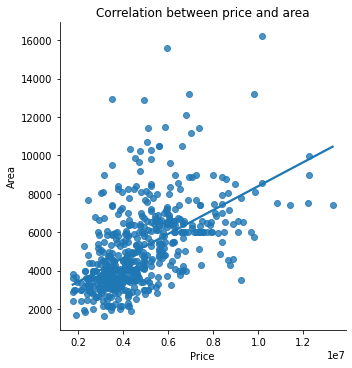

In [6]:
print("Correlation between price and Area:", df['price'].corr(df['area']))
sns.lmplot(x="price", y="area", data=df, ci=None)
plt.xlabel("Price")
plt.ylabel('Area')
plt.title('Correlation between price and area');

Moderate correlation seen between prices and area of houses

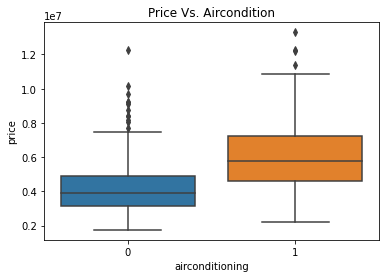

In [7]:
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price Vs. Aircondition');

Houses with aircondition are slightly more expensive

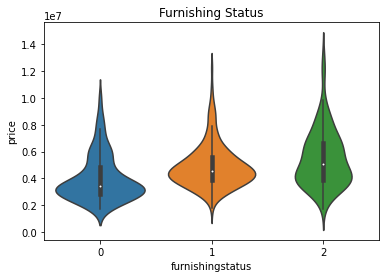

In [8]:
sns.violinplot(x='furnishingstatus', y='price', data=df)
plt.title("Furnishing Status");

Variation in prices in houses depending on its furnishing status: semi-furnished houses > un-furnished > furnished

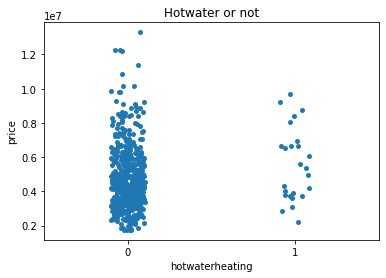

In [9]:
sns.stripplot(x='hotwaterheating', y='price', data=df)
plt.title("Hotwater or not");

There are more houses without hotwater systems

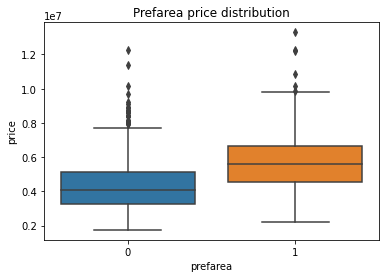

In [10]:
sns.boxplot(x='prefarea', y= 'price', data=df)
plt.title("Prefarea price distribution");

Moderate relationship between prices and prefarea

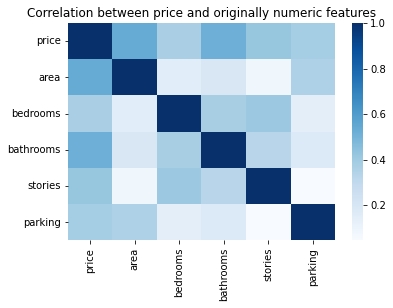

In [11]:
cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
corr = df[cols].corr()
sns.heatmap(corr, cmap="Blues")
plt.title("Correlation between price and originally numeric features");

The above heatamp shows the relationship between prices and the originally numeric columns

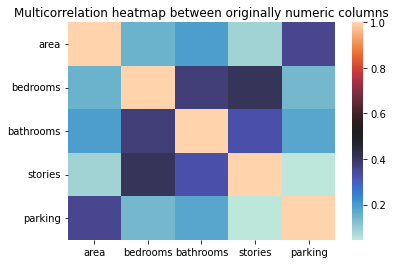

In [12]:
multi_colinearity = df[cols].drop(columns='price').corr()
sns.heatmap(multi_colinearity, cmap="icefire")
plt.title("Multicorrelation heatmap between originally numeric columns");

No multicolinearity seen 

3. Prepare data for model building 

In [13]:
target = 'price'
X = df.drop(columns= target)
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

4. Build Model, Iterate and calculate performance

a. Linear Regression

In [15]:
model =LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_MAE = mean_absolute_error(y_train, model.predict(X_train))
y_test_MAE = mean_absolute_error(y_test, model.predict(X_test))
print("Training_MAE:", round(y_train_MAE, 2))
print("Test_MAE:", round(y_test_MAE, 2))

Training_MAE: 749288.98
Test_MAE: 842236.9


In [17]:
Lr_r2_score = r2_score(y_test, model.predict(X_test))
Lr_r2_score

0.6908420826019943

In [18]:
print("RMSE of Linear_model:", mean_squared_error(y_test, model.predict(X_test)))

RMSE of Linear_model: 1532529023037.3093


In [19]:
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Training Score: 0.6549992833113175
Test Score: 0.6908420826019943


b. Decision Tree Regressor

In [20]:
model_DT = DecisionTreeRegressor(max_depth = 10, min_samples_split=20, random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [21]:
model_DT.get_depth()

10

In [22]:
y_train_MAE = mean_absolute_error(y_train, model_DT.predict(X_train))
y_test_MAE = mean_absolute_error(y_test, model_DT.predict(X_test))
print("Training_MAE:", round(y_train_MAE, 2))
print("Test_MAE:", round(y_test_MAE, 2))

Training_MAE: 657890.77
Test_MAE: 995973.27


In [23]:
DT_r2_score = r2_score(y_test, model_DT.predict(X_test))
DT_r2_score

0.5725668209490856

In [24]:
print("RMSE of Decision_Tree_Model:", mean_squared_error(y_test, model_DT.predict(X_test)))

RMSE of Decision_Tree_Model: 2118832206588.2012


In [25]:
print("Training Score:", model_DT.score(X_train, y_train))
print("Test Score:", model_DT.score(X_test, y_test))

Training Score: 0.7308397634938573
Test Score: 0.5725668209490856


c. Random Forest Regressor

In [26]:
model_rf = RandomForestRegressor(max_depth=4,n_estimators=11, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=11, random_state=42)

In [27]:
y_train_MAE = mean_absolute_error(y_train, model_rf.predict(X_train))
y_test_MAE = mean_absolute_error(y_test, model_rf.predict(X_test))
print("Training_MAE:", round(y_train_MAE, 2))
print("Test_MAE:", round(y_test_MAE, 2))

Training_MAE: 721536.39
Test_MAE: 938966.71


In [28]:
RF_r2_score = r2_score(y_test, model_rf.predict(X_test))
RF_r2_score

0.6071526480789078

In [29]:
print("RMSE of Random_Forest_model:", mean_squared_error(y_test, model_rf.predict(X_test)))

RMSE of Random_Forest_model: 1947386544422.0686


In [30]:
print("Training Score:", model_rf.score(X_train, y_train))
print("Test Score:", model_rf.score(X_test, y_test))

Training Score: 0.6863474325027024
Test Score: 0.6071526480789078


Linear Regression is the most suitable to make predictions for this data because it was able to generalize better than the other models

5. Put together models and visualize performance

In [31]:
model_performances = pd.DataFrame( 
    {
        "r2_score" : [r2_score(y_test, model.predict(X_test)), r2_score(y_test, model_DT.predict(X_test)), r2_score(y_test, model_rf.predict(X_test))],
        "RMSE" : [mean_squared_error(y_test, model.predict(X_test)), mean_squared_error(y_test, model_DT.predict(X_test)), mean_squared_error(y_test, model_rf.predict(X_test))],
        "Test_MAE" : [mean_absolute_error(y_test, model.predict(X_test)), mean_absolute_error(y_test, model_DT.predict(X_test)), mean_absolute_error(y_test, model_rf.predict(X_test))],
        "model_score" : [model.score(X_test, y_test), model_DT.score(X_test, y_test), model_rf.score(X_test, y_test)]
    }, index = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
)

model_performances

,r2_score,RMSE,Test_MAE,model_score
LinearRegression,0.690842,1.532529e+12,842236.895098,0.690842
DecisionTreeRegressor,0.572567,2.118832e+12,995973.270686,0.572567
RandomForestRegressor,0.607153,1.947387e+12,938966.713783,0.607153


In [32]:
fig = px.line(model_performances['model_score'].sort_values(), labels= {"index" :  "Models Used", "value" : "model_score"}, markers=True)
fig.show()

Thank you!